In [1]:
import numpy as np
from ler import LeR
import matplotlib.pyplot as plt
%matplotlib inline
import json

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
ler = LeR(snr_type="inner_product", waveform_approximant="IMRPhenomD", spin_constant=False)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}


In [3]:
ler.batch_size = 100
test = ler.unlensed_cbc_statistics(nsamples=200, resume=False)

chosen batch size = 100. If you want to change batch size, self.batch_size = new_size
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 515.50it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 550.50it/s]


In [5]:
test.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'L1', 'H1', 'V1', 'opt_snr_net'])

In [10]:
from ler import CompactBinaryPopulation

In [11]:
cbc = CompactBinaryPopulation(spin_constant=False)

In [13]:
cbc.binary_spin?

Object `cbc.binary_spin` not found.


In [12]:
xxl1,yyl1,ffl1 = contfunc(dt12,dmu12)
xxl2,yyl2,ffl2 = contfunc(dt34,dmu34)

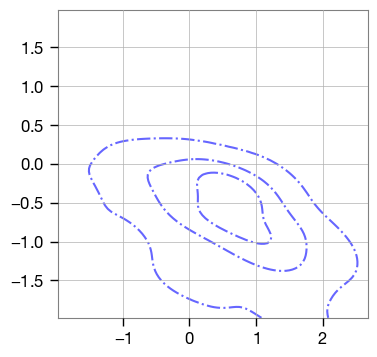

In [16]:
xmin =np.log10(1e-2) 
xmax =np.log10(5e2)  
ymin =np.log10(1e-2)    
ymax =np.log10(1e2)  
extent_im=[xmin, xmax, ymin, ymax]
levels_l=contlevs(ffl1) 

plt.contour(np.rot90(ffl2), levels_l, colors='blue', linestyles='dashdot', origin='upper', alpha=0.6, extent=extent_im)
plt.show()

In [24]:
"out_fincat_%s/all_lensprop.txt"%("O3")

'out_fincat_O3/all_lensprop.txt'

In [14]:
mu_all = test['magnifications']
snr_all = test['opt_snr_net']
dt_all = test['time_delays']

In [16]:
mu1 = []
mu2 = []
dt1 = []
dt2 = []
for i in range(len(mu_all)):
    if snr_all[i,0]>8. and snr_all[i,1]>8.:
        mu1.append(snr_all[i,0])
        mu2.append(snr_all[i,1])
        dt1.append(dt_all[i,0])
        dt2.append(dt_all[i,1])
        
mu1 = np.array(mu1)
mu2 = np.array(mu2)
dt1 = np.array(dt1)
dt2 = np.array(dt2)

# relative magnification
dmu12 = abs(mu2/mu1)
# relative time delays
dt12 = abs(dt2-dt1)

mu3 = []
mu4 = []
dt3 = []
dt4 = []
for i in range(len(mu_all)):
    if snr_all[i,2]>8. and snr_all[i,3]>8.:
        mu3.append(snr_all[i,2])
        mu4.append(snr_all[i,3])
        dt3.append(dt_all[i,2])
        dt4.append(dt_all[i,3])
        
mu3 = np.array(mu3)
mu4 = np.array(mu4)
dt3 = np.array(dt3)
dt4 = np.array(dt4)

# relative magnification
dmu34 = abs(mu4/mu3)
# relative time delays
dt34 = abs(dt4-dt3)

In [21]:
dmu1 = np.concatenate(((dmu12,dmu34))
dt1 = np.concatenate(((dt12,dt34))/(60*60*24) # to days

In [38]:
xxl1,yyl1,ffl1 = contfunc(dt_rel0,mu_rel0)

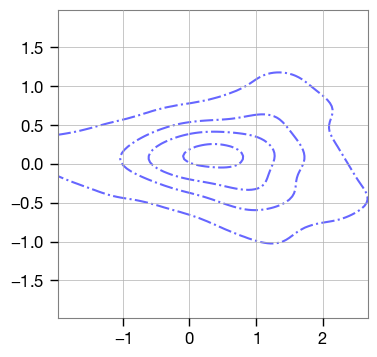

In [39]:
xmin =np.log10(1e-2) 
xmax =np.log10(5e2)  
ymin =np.log10(1e-2)    
ymax =np.log10(1e2)  
extent_im=[xmin, xmax, ymin, ymax]
levels_l=contlevs(ffl1) 

plt.contour(np.rot90(ffl1), levels_l, colors='blue', linestyles='dashdot', origin='upper', alpha=0.6, extent=extent_im)
plt.show()

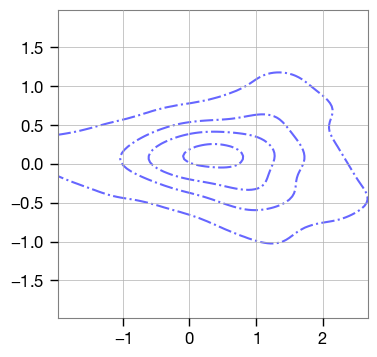

In [40]:
plt.contour(np.rot90(ff), contlevs(ff), colors='blue', linestyles='dashdot', origin='upper', alpha=0.6, extent=extent_im)
plt.show()

In [18]:
df = sns.load_dataset('iris')
 
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
x = np.log10(dt1)
y = np.log(dmu1)
sns.kdeplot(x=x, y=y,legend=True, levels=1,thresh=.68)
sns.kdeplot(x=x, y=y,legend=True, levels=1,thresh=.95)
sns.kdeplot(x=x, y=y,legend=True, levels=1,thresh=.997)
#plt.xlim(-2, 3)
#plt.ylim(-2, 2)
plt.xlabel(r'$log(abs(\Delta t_{21}))\,days$')
plt.ylabel(r'$log10(\mu_2/\mu_1)$')
plt.title('relative time delay vs relative magnification \n Image type I')
plt.legend()
plt.grid()
plt.show()

NameError: name 'sns' is not defined

In [49]:
np.array([1,2,3])[::-1]

array([3, 2, 1])